# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

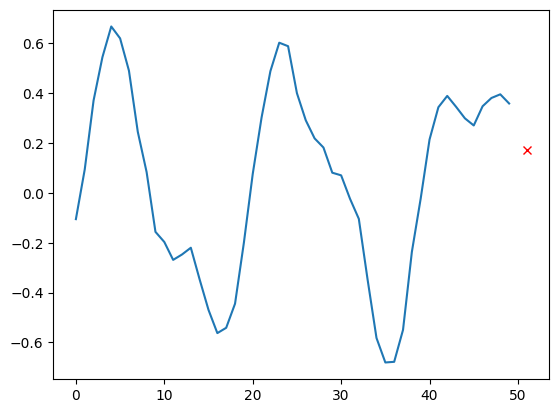

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [10]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [11]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [12]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 3s 4ms/step - loss: 0.1576 - mean_squared_error: 0.1576 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 4/5
219/219 [==============================] - 1s 4ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


In [14]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

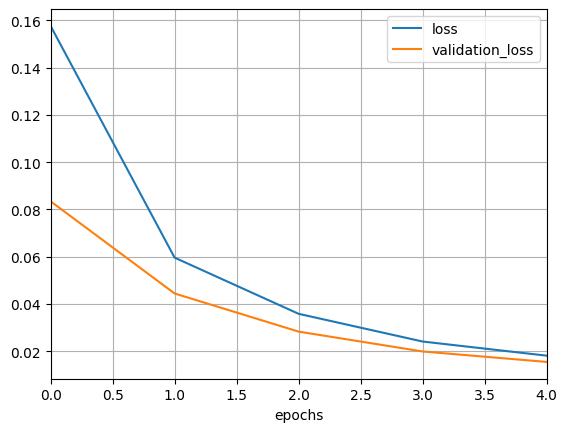

In [15]:
plot_function(history_linear)

In [16]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.015507380478084087
Test MSE:  0.015507380478084087


### 1.5 Simple RNN Model

In [17]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [18]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [19]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 9s 38ms/step - loss: 0.6906 - mean_squared_error: 0.6906 - val_loss: 0.5828 - val_mean_squared_error: 0.5828
Epoch 2/5
219/219 [==============================] - 7s 31ms/step - loss: 0.4006 - mean_squared_error: 0.4006 - val_loss: 0.3716 - val_mean_squared_error: 0.3716
Epoch 3/5
219/219 [==============================] - 8s 36ms/step - loss: 0.3231 - mean_squared_error: 0.3231 - val_loss: 0.3264 - val_mean_squared_error: 0.3264
Epoch 4/5
219/219 [==============================] - 7s 31ms/step - loss: 0.2869 - mean_squared_error: 0.2869 - val_loss: 0.2919 - val_mean_squared_error: 0.2919
Epoch 5/5
219/219 [==============================] - 8s 36ms/step - loss: 0.2556 - mean_squared_error: 0.2556 - val_loss: 0.2602 - val_mean_squared_error: 0.2602


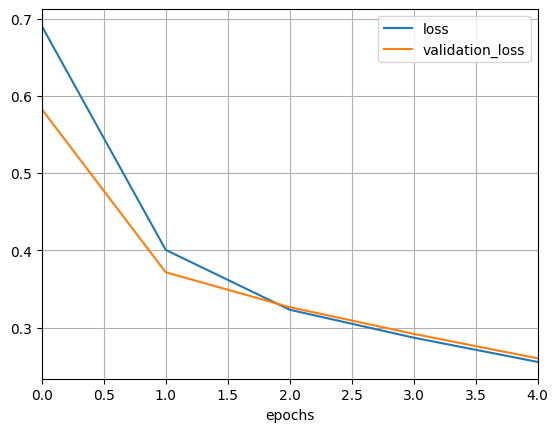

In [20]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [21]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [22]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [23]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 32s 130ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 2/5
219/219 [==============================] - 29s 132ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/5
219/219 [==============================] - 39s 179ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/5
219/219 [==============================] - 28s 128ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/5
219/219 [==============================] - 28s 129ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


In [24]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0035069729201495647
Test MSE:  0.0035069729201495647


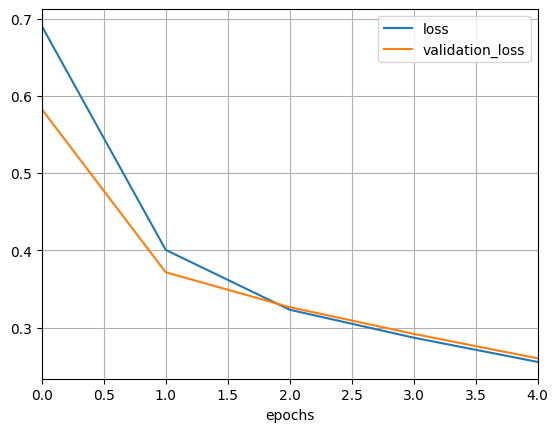

In [25]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [26]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [27]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 2s 0us/step


### 2.2 - Dataset examination

In [28]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 [==============================] - 1s 1us/step


In [29]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [30]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [31]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [46]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [47]:
optimizer = Adam(learning_rate = 0.001)

In [48]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 175s 275ms/step - loss: 0.7015 - accuracy: 0.4970 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/5
625/625 [==============================] - 145s 232ms/step - loss: 0.6973 - accuracy: 0.4997 - val_loss: 0.6965 - val_accuracy: 0.5062
Epoch 3/5
625/625 [==============================] - 161s 258ms/step - loss: 0.6956 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 4/5
625/625 [==============================] - 143s 229ms/step - loss: 0.6966 - accuracy: 0.4968 - val_loss: 0.6934 - val_accuracy: 0.4938
Epoch 5/5
625/625 [==============================] - 145s 231ms/step - loss: 0.6951 - accuracy: 0.5002 - val_loss: 0.7022 - val_accuracy: 0.4938


In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.7006866931915283
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

**Using LSTM neurons**

In [51]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [52]:
optimizer = Adam(learning_rate = 0.001)

In [53]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [54]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 38s 55ms/step - loss: 0.6794 - accuracy: 0.5654 - val_loss: 0.6754 - val_accuracy: 0.5664
Epoch 2/5
625/625 [==============================] - 14s 22ms/step - loss: 0.6850 - accuracy: 0.5445 - val_loss: 0.6512 - val_accuracy: 0.6192
Epoch 3/5
625/625 [==============================] - 13s 20ms/step - loss: 0.6678 - accuracy: 0.6002 - val_loss: 0.6295 - val_accuracy: 0.6778
Epoch 4/5
625/625 [==============================] - 12s 18ms/step - loss: 0.4984 - accuracy: 0.7637 - val_loss: 0.5140 - val_accuracy: 0.7438
Epoch 5/5
625/625 [==============================] - 11s 18ms/step - loss: 0.4084 - accuracy: 0.8192 - val_loss: 0.4031 - val_accuracy: 0.8162


In [55]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.3887907564640045
Test accuracy:  82.53999948501587 %


**Using GRU**

In [86]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [87]:
optimizer = Adam(learning_rate = 0.0001)

In [88]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [89]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 36s 54ms/step - loss: 0.6907 - accuracy: 0.5249 - val_loss: 0.6656 - val_accuracy: 0.5928
Epoch 2/5
625/625 [==============================] - 15s 24ms/step - loss: 0.4737 - accuracy: 0.7707 - val_loss: 0.4194 - val_accuracy: 0.8092
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3898 - accuracy: 0.8278 - val_loss: 0.3954 - val_accuracy: 0.8236
Epoch 4/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3726 - accuracy: 0.8378 - val_loss: 0.3951 - val_accuracy: 0.8254
Epoch 5/5
625/625 [==============================] - 11s 17ms/step - loss: 0.3681 - accuracy: 0.8393 - val_loss: 0.4358 - val_accuracy: 0.8212


In [90]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.42250657081604004
Test accuracy:  82.04799890518188 %


The best results has GRU core but LSTM is a bit faster.